In [1]:
# Install a pip package in the current Jupyter kernel
import sys
# !{sys.executable} -m pip install matplotlib==3.2.2

In [2]:
import pandas as pd
import datetime
import numpy as np
import math
import matplotlib.pyplot as plt
import yahoo_fin.stock_info as si
import requests
import investpy
from swrsimulator import sustainable_withdrawal_rate
from backtestHelper import backtest

In [3]:
def sim_leverage(proxy, leverage=1, expense_ratio=0.0095, initial_value=1.0):
    """
    Simulates a leverage ETF given its proxy, leverage, and expense ratio.
    
    Daily percent change is calculated by taking the daily percent change of
    the proxy, subtracting the daily expense ratio, then multiplying by the leverage.
    """
    if leverage == 1:
        return proxy
    else:
        pct_change = proxy.pct_change(1)
        pct_change = (pct_change - expense_ratio / 252) * leverage
        sim = (1 + pct_change).cumprod() * initial_value
        sim[0] = initial_value
        sim[sim < 0] = 0
        sim = sim.round(2)
        return sim

In [4]:
# swr = sustainable_withdrawal_rate(["",""])

In [5]:
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2021, 8, 6)

test_tickers = ["VFINX", "VUSTX"]
test_stocks = []

for ticker in test_tickers:
    test_stocks.append(si.get_data(ticker, start, end)["adjclose"])

In [6]:
upro_sim = sim_leverage(test_stocks[0], leverage=3).to_frame("close")
tmf_sim = sim_leverage(test_stocks[1], leverage=3).to_frame("close")

vti_sim = si.get_data('VTI', start, end).adjclose.to_frame("close")
spy_sim = si.get_data('SPY', start, end).adjclose.to_frame("close")

buying starting allocation
buying 0.0 shares of SPY for roughly $0.01
processing deposit 1999.99 on 2021-07-07 00:00:00
old cash sweep balance: 0.011776829491242482
buying 4 shares of SPY for roughly $1723.6800537109375 with a balance of 2000.0017768294913
processing deposit 1098.61 on 2021-08-02 00:00:00
old cash sweep balance: 2026.6817933146006
buying 7 shares of SPY for roughly $3088.0499572753906 with a balance of 3125.2917933146005


<IPython.core.display.Javascript object>


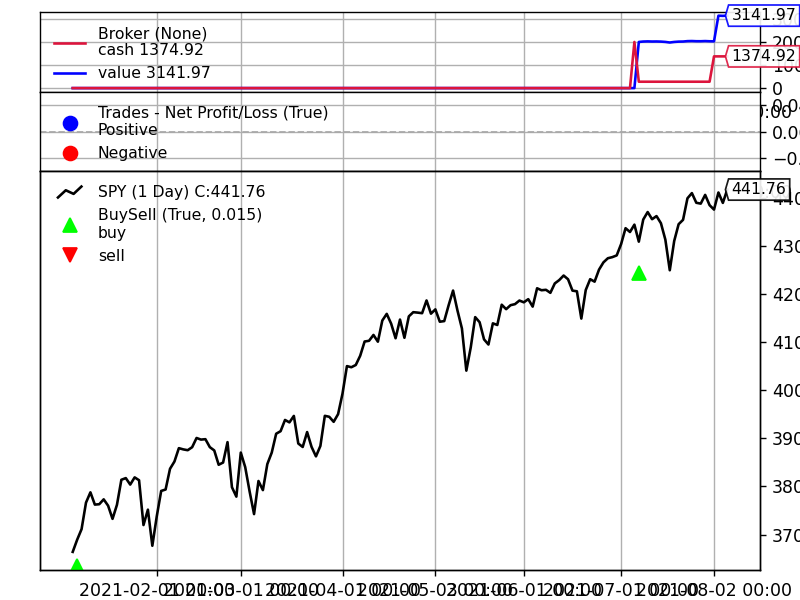

,max_drawdown,annual_return,cum_returns,sharpe_ratio,sortino_ratio,omega_ratio,calmar_ratio
0,-0.040597,1.982813e+09,314196.196006,1.300496,3.357589e+06,450573.63808,4.884139e+10


In [7]:
%matplotlib ipympl

starting_value = 0.01
deposits = [[1999.99, datetime.datetime(2021, 7, 7)],[1098.61, datetime.datetime(2021, 8, 2)]]

#out = backtest([upro_sim, tmf_sim], test_tickers, plot=True)
#out = backtest([vti_sim], ["VTI"], weights=[1], plot=True, deposits=deposits, starting_value=starting_value)
out = backtest([spy_sim], ['SPY'], weights=[1], plot=True, deposits=deposits, starting_value=starting_value)
pd.DataFrame([out], columns=['max_drawdown', 'annual_return', 'cum_returns',
                           'sharpe_ratio', 'sortino_ratio', 'omega_ratio', 'calmar_ratio'])